In [1]:
#Import necesssary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dropout = pd.read_csv("dropout-ratio-2012-2015.csv")

In [3]:
dropout.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [4]:
dropout['State_UT'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal  Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya  Pradesh', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil  Nadu', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'All India'], dtype=object)

In [5]:
dropout['State_UT'] = dropout['State_UT'].replace({'Madhya  Pradesh' : 'Madhya Pradesh', 'Tamil  Nadu' : 'Tamil Nadu'})

In [6]:
dropout['Upper Primary_Boys'] = dropout['Upper Primary_Boys'].replace('Uppe_r_Primary', 'NR')
dropout['Upper Primary_Boys']

0        NR
1        NR
2      1.44
3      3.21
4      3.46
       ... 
105    5.63
106    5.84
107     2.3
108    3.09
109    3.49
Name: Upper Primary_Boys, Length: 110, dtype: object

In [7]:
def replace(values):
    if values == 'NR':
        return np.nan
    elif isinstance(values, str):
        return values
    else :
        return float(values)

dropout = dropout.applymap(replace)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14120\2141449921.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dropout = dropout.applymap(replace)


In [8]:
dropout.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,NaN,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [9]:
cols = ['Primary_Boys', 'Primary_Girls', 'Primary_Total', 'Upper Primary_Boys', 'Upper Primary_Girls', 'Upper Primary_Total','Secondary _Boys',
        'Secondary _Girls', 'Secondary _Total', 'HrSecondary_Boys', 'HrSecondary_Girls', 'HrSecondary_Total']
dropout[cols] = dropout[cols].apply(pd.to_numeric, errors='coerce', axis=1)        

In [10]:
dropout[cols] = dropout[cols].fillna(dropout[cols].mean())
dropout.head(3)

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,4.236667,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,4.236667,1.54,0.51,8.36,5.98,7.20,18.94,12.20,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.440000,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93


In [11]:
dropout.describe()

,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,4.971368,4.644105,4.908602,4.236667,4.496471,4.181089,17.809906,16.926981,17.393868,9.347317,7.206974,8.296329
std,4.349218,4.262765,4.241890,3.019351,3.239103,3.147070,8.279257,8.848835,8.449971,6.172234,4.324988,5.190534
min,0.000000,0.260000,0.200000,0.010000,0.000000,0.070000,5.570000,4.210000,5.320000,0.230000,0.300000,0.350000
25%,1.510000,1.265000,1.495000,2.550000,2.442500,2.067500,11.927500,9.952500,11.242500,5.962500,4.780000,5.765000
50%,4.605000,4.120000,4.620000,4.188333,4.090000,4.025000,16.575000,15.660000,15.800000,9.347317,7.206974,8.296329
75%,6.742500,5.870000,6.300000,5.422500,5.835000,5.462500,23.012500,21.682500,22.832500,11.765000,8.470000,9.380000
max,24.270000,23.930000,24.110000,19.350000,19.210000,19.280000,50.090000,49.620000,49.860000,44.380000,36.050000,40.480000


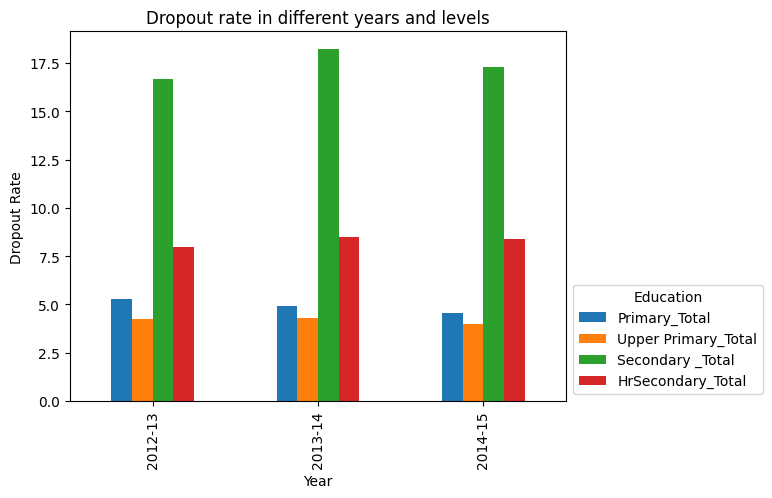

In [12]:
dr_rate = dropout.groupby('year')[['Primary_Total', 'Upper Primary_Total', 'Secondary _Total', 'HrSecondary_Total']].mean().reset_index()
ax = dr_rate.plot(x = 'year', kind = 'bar' , stacked = False, title = 'Dropout rate in different years and levels')
ax.set(xlabel='Year', ylabel='Dropout Rate')
ax.legend(title='Education', bbox_to_anchor=(1, 0), loc='lower left') 

In [13]:
dropout_mean = dropout.groupby('State_UT')[cols].mean()
dropout_mean.head()

,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
State_UT,,,,,,,,,,,,
A & N Islands,0.883333,0.706667,0.80,3.304444,1.526667,1.143333,8.466667,6.563333,7.543333,19.216667,11.520000,15.646667
All India,4.523333,4.226667,4.38,2.960000,4.366667,3.643333,16.560000,16.403333,16.486667,3.692439,5.341316,6.044219
Andhra Pradesh,4.726667,4.776667,4.75,3.920000,4.316667,4.113333,13.323333,14.073333,13.693333,8.219106,8.421316,6.812110
Arunachal Pradesh,11.540000,10.220000,10.89,4.440000,6.740000,5.590000,16.080000,12.750000,14.490000,18.570000,15.490000,17.070000
Arunachal Pradesh,13.675000,12.265000,12.99,5.585000,8.570000,7.090000,16.160000,13.790000,15.020000,13.610000,9.790000,11.765000


<Axes: ylabel='State_UT'>

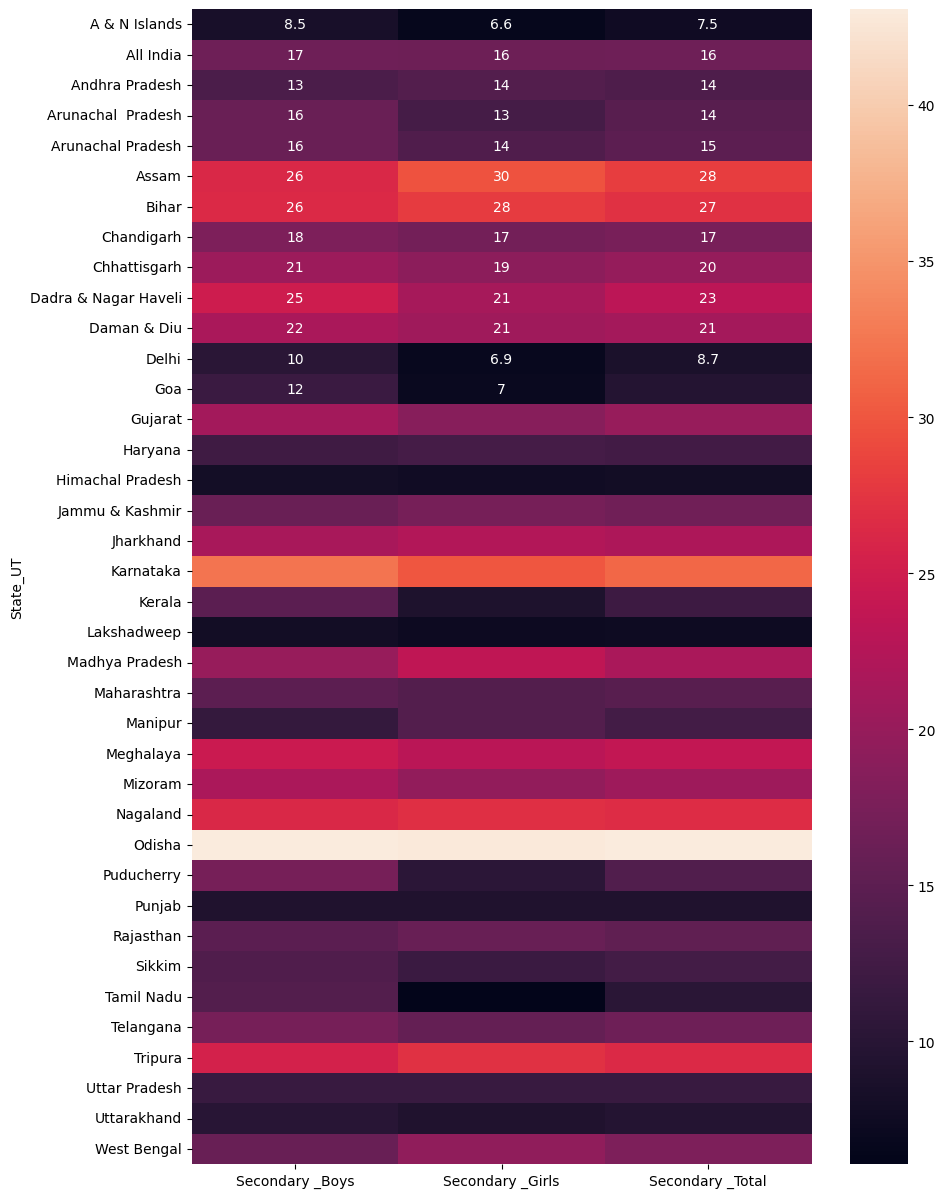

In [28]:
secondary = ['Secondary _Boys', 'Secondary _Girls', 'Secondary _Total']
plt.figure(figsize=(10, 15))
sns.heatmap(dropout_mean[secondary], annot=True)